In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

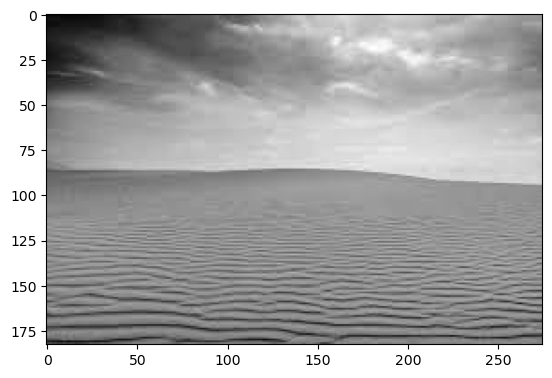

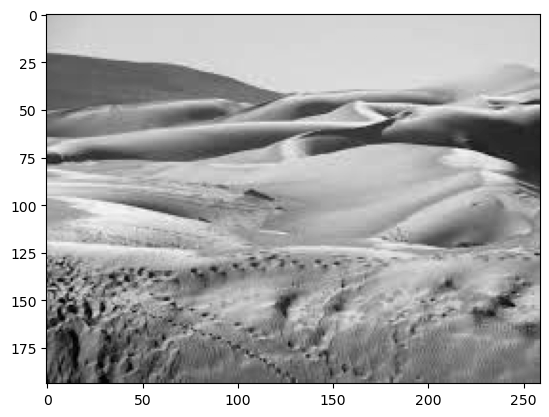

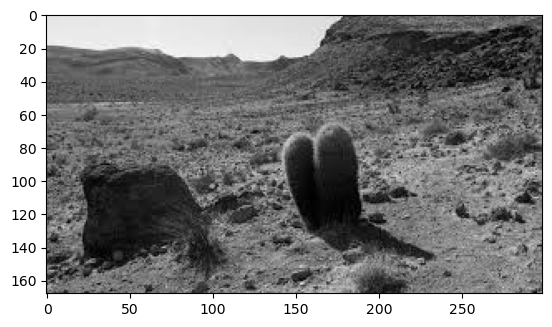

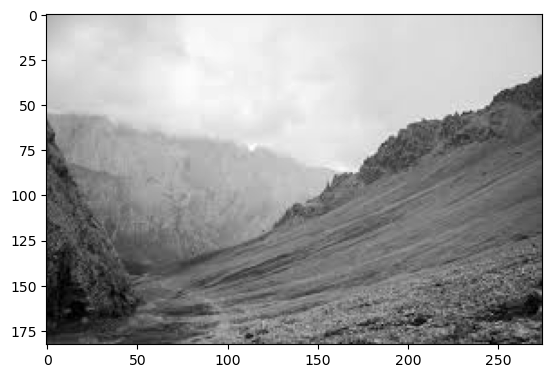

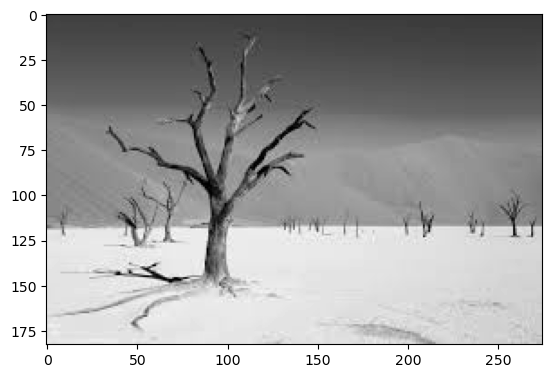

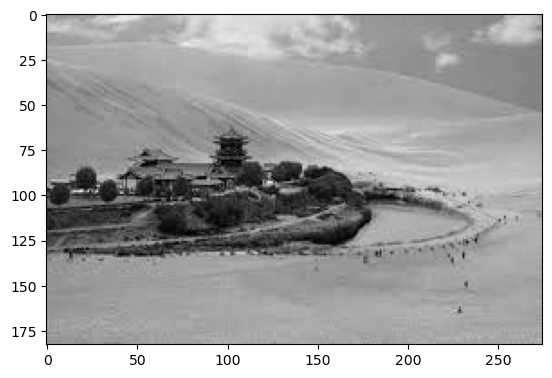

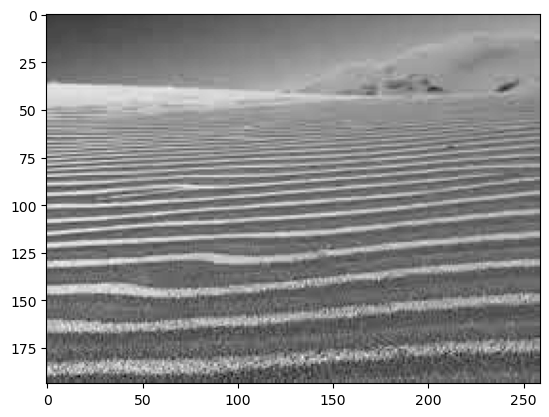

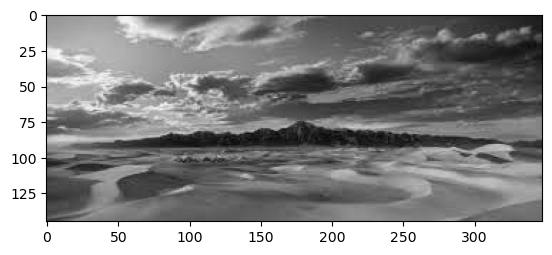

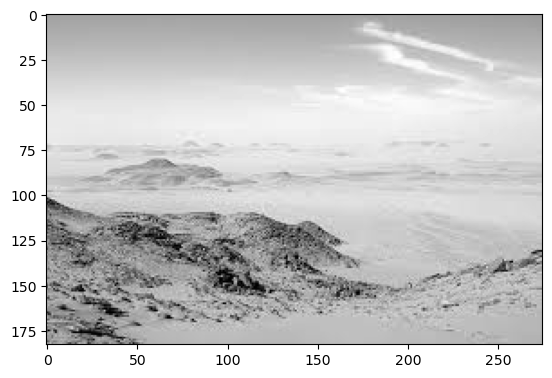

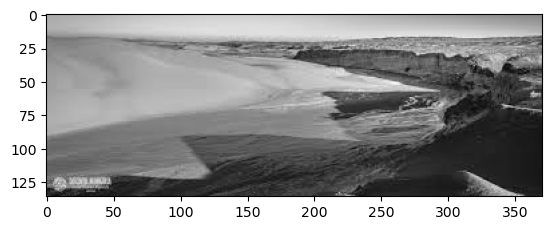

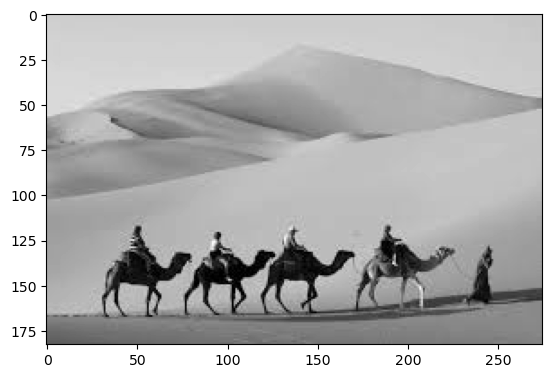

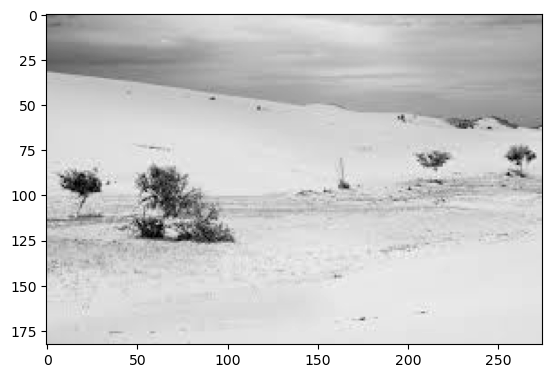

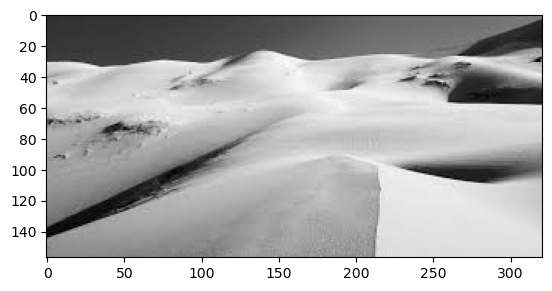

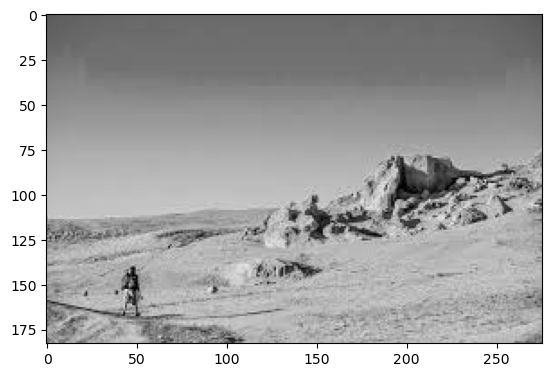

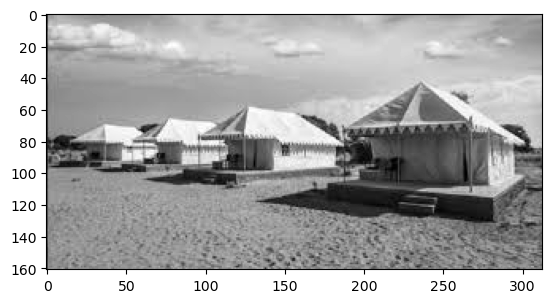

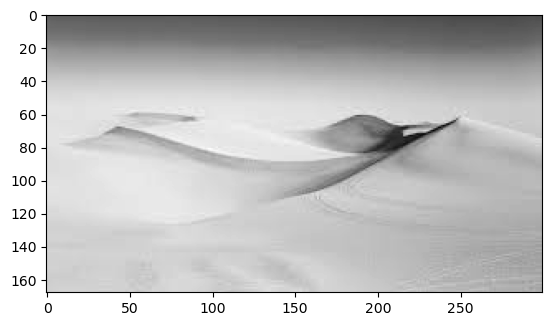

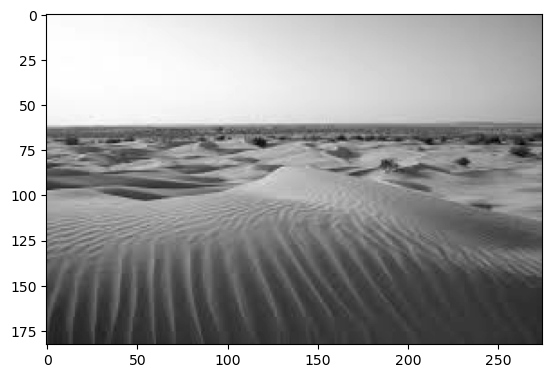

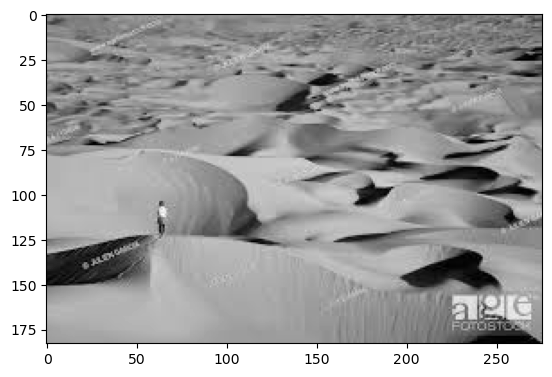

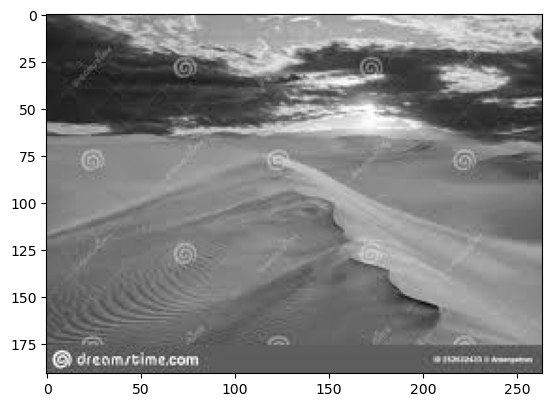

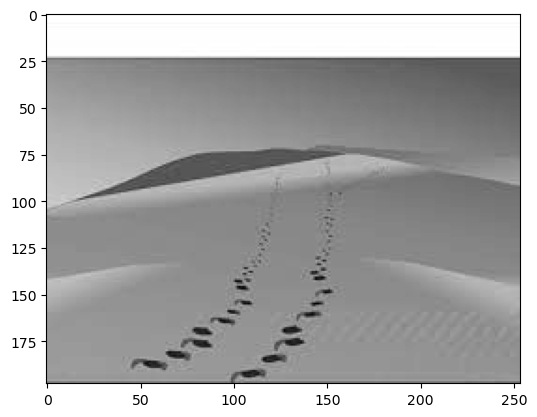

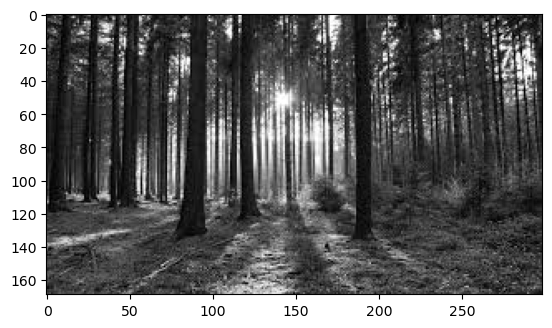

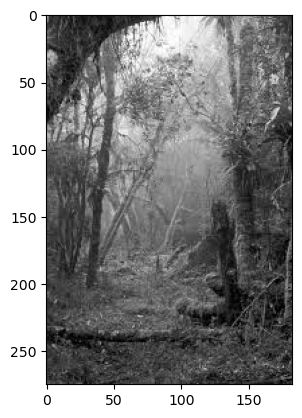

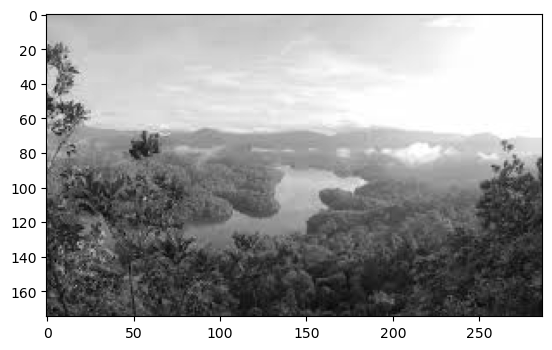

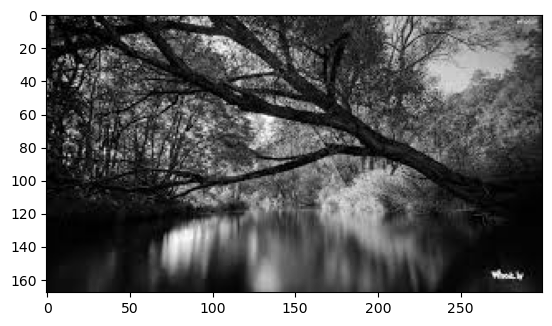

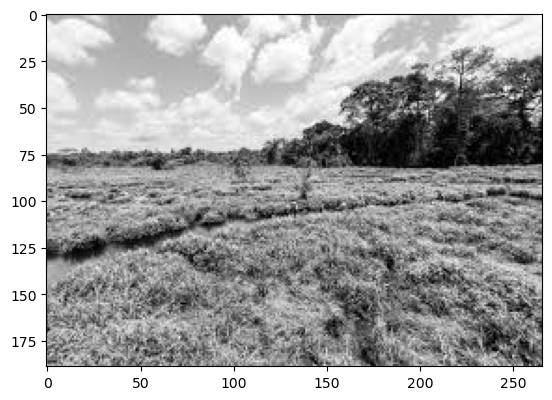

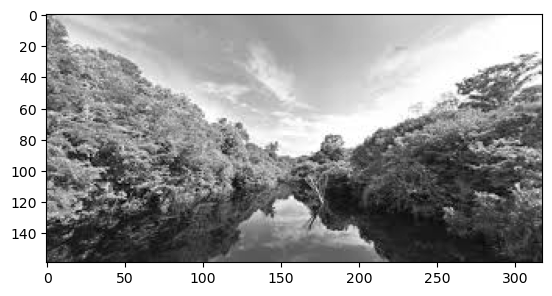

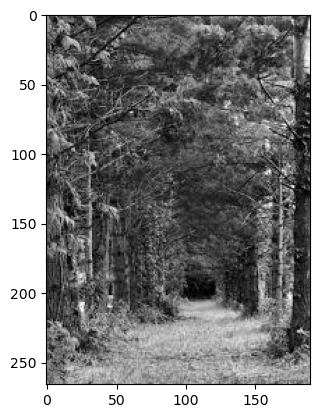

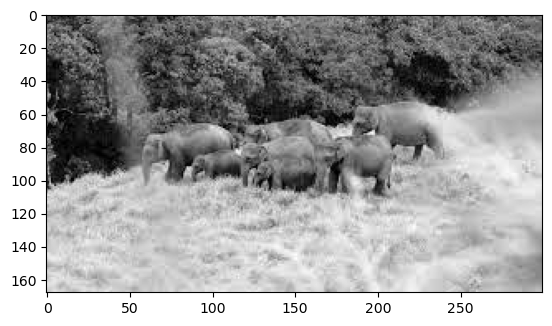

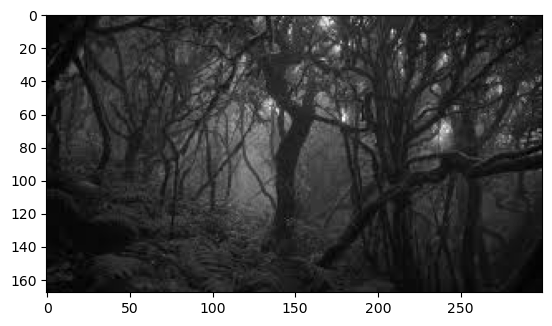

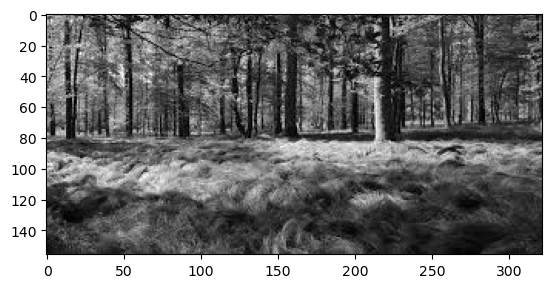

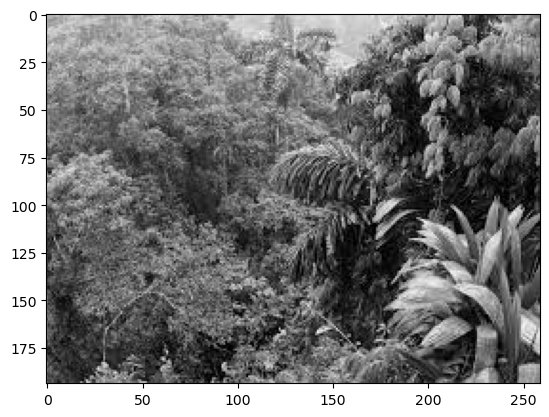

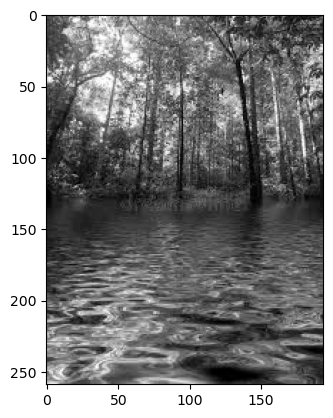

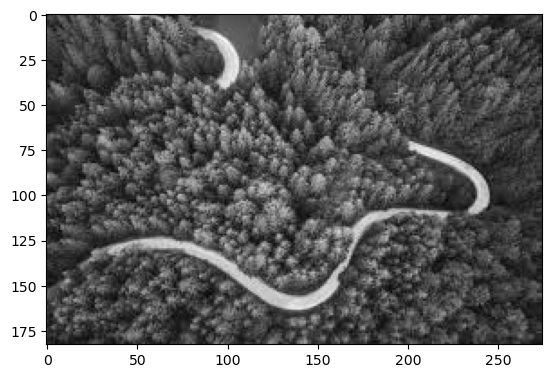

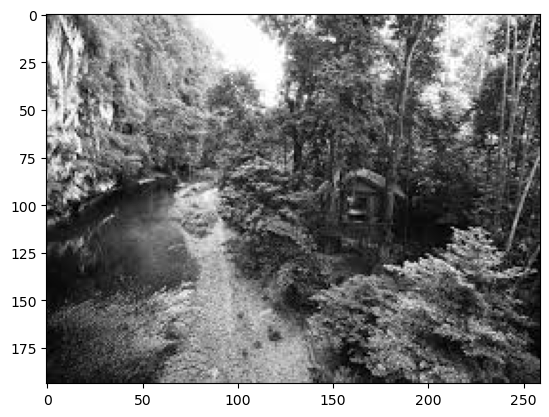

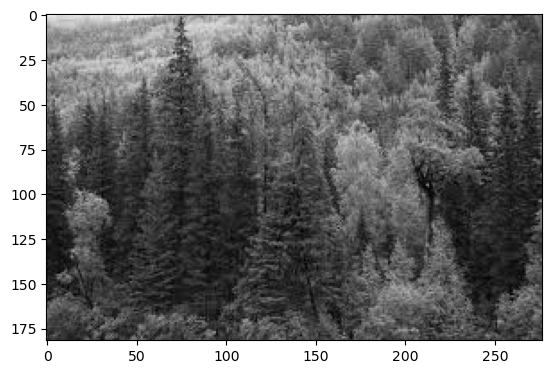

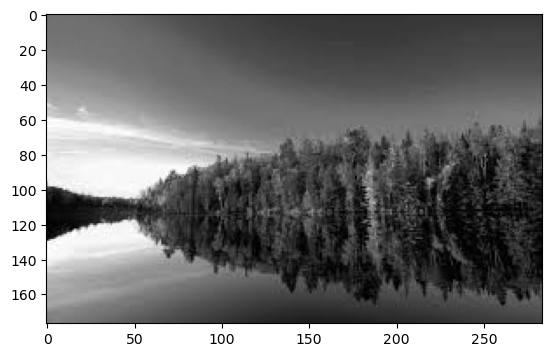

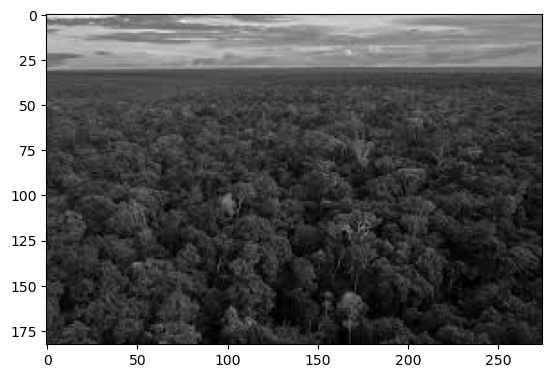

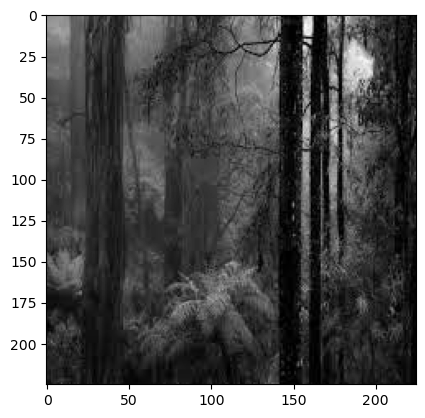

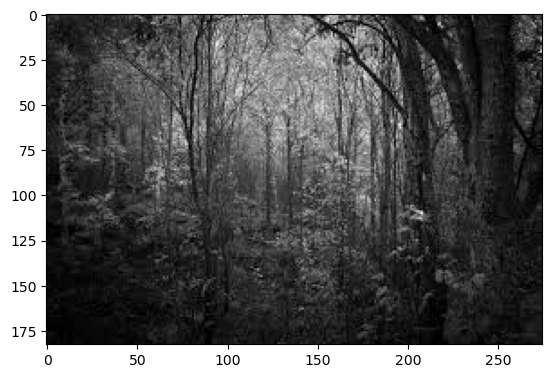

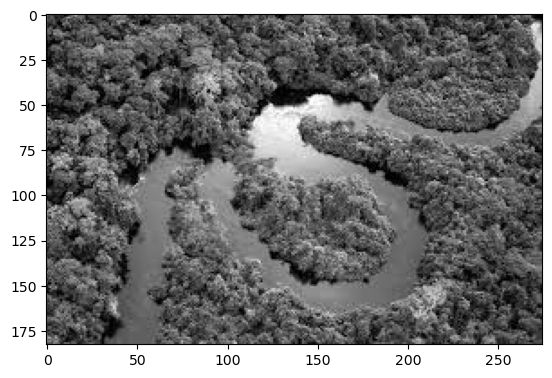

In [81]:
DATADIR = 'Images'
CATEGORIES = ["Desert", "Forest"]
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)
    i=0
    for img in os.listdir(path):
        i+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        if i==20:
            break

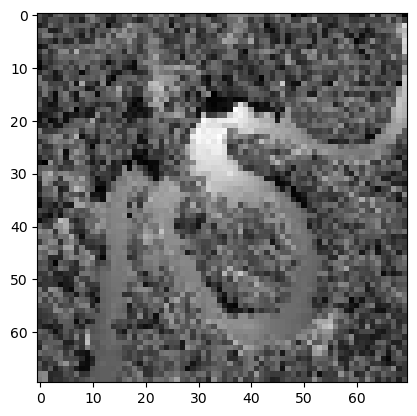

In [104]:
# IMG_SIZE = 50
# IMG_SIZE = 80
IMG_SIZE = 70
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

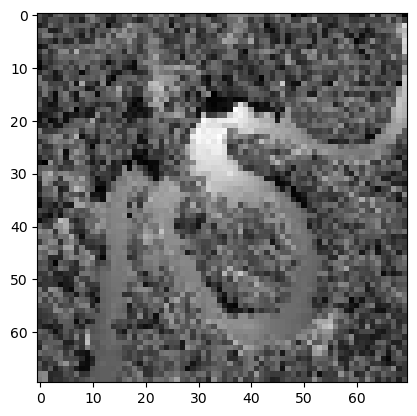

In [105]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [106]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:
                pass

create_training_data()

print(len(training_data))

100%|██████████| 401/401 [00:00<00:00, 1418.46it/s]

802


In [107]:
import random

random.shuffle(training_data)

In [108]:
for sample in training_data[:20]:
    print(sample[1])

0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
1
1


In [121]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[133]
   [134]
   [136]
   ...
   [136]
   [136]
   [134]]

  [[135]
   [136]
   [137]
   ...
   [133]
   [133]
   [133]]

  [[137]
   [139]
   [138]
   ...
   [132]
   [132]
   [132]]

  ...

  [[  1]
   [  1]
   [  2]
   ...
   [ 24]
   [  4]
   [  1]]

  [[  1]
   [  1]
   [  1]
   ...
   [  1]
   [  1]
   [  1]]

  [[  1]
   [  1]
   [  1]
   ...
   [  1]
   [  1]
   [  1]]]]


In [122]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
 
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=50)

In [124]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [125]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [131]:
model.fit(X_train, y_train, epochs=37)

Epoch 1/37
13/13 [==============================] - 0s 7ms/step - loss: 0.2374 - accuracy: 0.9152
Epoch 2/37
13/13 [==============================] - 0s 7ms/step - loss: 0.1041 - accuracy: 0.9626
Epoch 3/37
13/13 [==============================] - 0s 7ms/step - loss: 0.0778 - accuracy: 0.9776
Epoch 4/37
13/13 [==============================] - 0s 8ms/step - loss: 0.0978 - accuracy: 0.9551
Epoch 5/37
13/13 [==============================] - 0s 7ms/step - loss: 0.0753 - accuracy: 0.9701
Epoch 6/37
13/13 [==============================] - 0s 7ms/step - loss: 0.0413 - accuracy: 0.9900
Epoch 7/37
13/13 [==============================] - 0s 7ms/step - loss: 0.0301 - accuracy: 0.9875
Epoch 8/37
13/13 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 0.9900
Epoch 9/37
13/13 [==============================] - 0s 8ms/step - loss: 0.0279 - accuracy: 0.9875
Epoch 10/37
13/13 [==============================] - 0s 9ms/step - loss: 0.0294 - accuracy: 0.9875
Epoch 11/37
13/13 [

In [132]:
test_loss, test_acc = model.evaluate(X_train, y_train)
test_acc

13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000


1.0

In [133]:
predict = model.predict(X_test)
y_predict = np.argmax(predict, axis=1)
print(y_predict[1])
print(y_test[1])

13/13 [==============================] - 0s 766us/step
0
0
